**IMPORTING LIBRARIES**

In [257]:
import pandas as pd
import numpy as np
import seaborn as sns

from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

**MAKING DATAFRAME**

In [260]:
diabetes=pd.read_csv("diabetes.csv")
type(diabetes)

pandas.core.frame.DataFrame

**DATA ANALYSIS**

In [262]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


<Axes: >

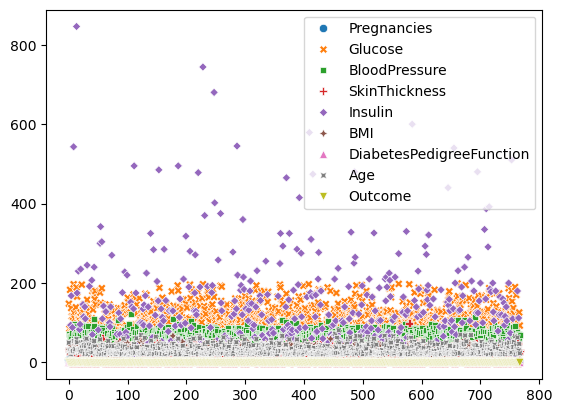

In [263]:
sns.scatterplot(diabetes)

In [358]:
dia_corr=diabetes.corr()

<Axes: >

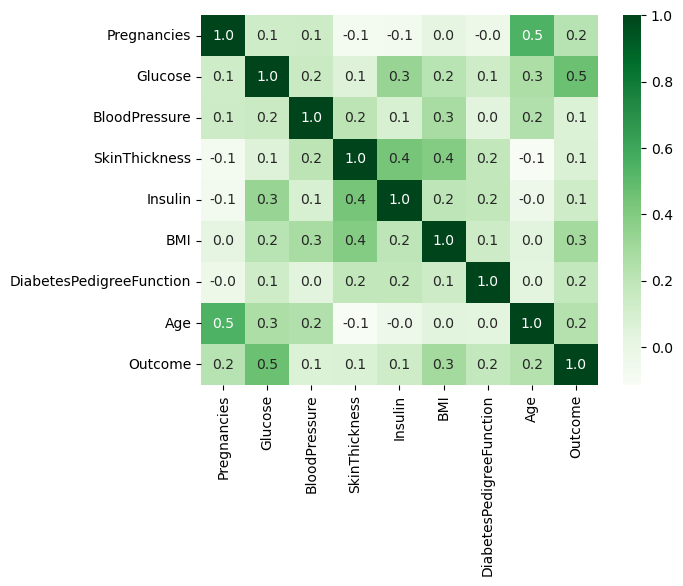

In [360]:
sns.heatmap(dia_corr, cbar=True, cmap='Greens', annot=True, fmt='.1f', annot_kws={'size':10})

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

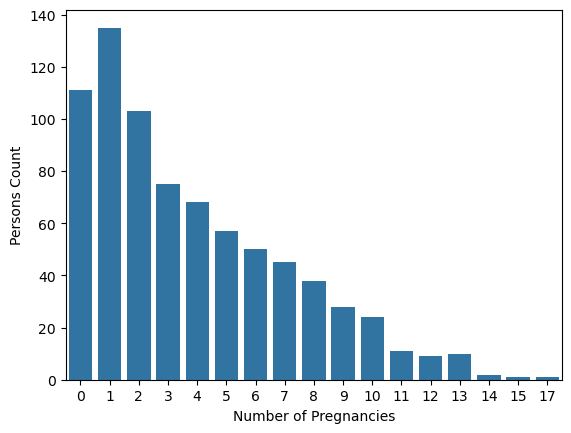

In [268]:
sns.countplot(x='Pregnancies', data=diabetes)
plt.xlabel('Number of Pregnancies')
plt.ylabel('Persons Count')
plt.show()

<Axes: xlabel='Pregnancies', ylabel='Age'>

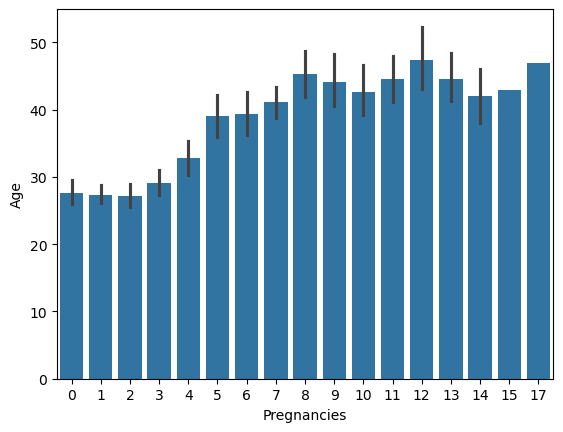

In [362]:
sns.barplot(x='Pregnancies',y='Age',data=diabetes)

In [269]:
diabetes.value_counts('Outcome')

Outcome
0    500
1    268
Name: count, dtype: int64

**MAKING BALANCED DATAFRAME OUT OF THIS IMBALANCED DATAFRAME**

In [272]:
non_diab=diabetes[diabetes.Outcome==0]
diab=diabetes[diabetes.Outcome==1]

In [274]:
print(non_diab.shape,diab.shape)

(500, 9) (268, 9)


In [275]:
non_diab.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,1,85,66,29,0,26.6,0.351,31,0
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0
10,4,110,92,0,0,37.6,0.191,30,0


In [276]:
diab.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
2,8,183,64,0,0,23.3,0.672,32,1
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1


**MAKING NEW DATAFRAME**

In [281]:
non_diab_sample=non_diab.sample(n=268)

In [286]:
diabetes_new=pd.concat([diab,non_diab_sample],axis=0)

**SHUFFLING THE DATAFRAME**

In [290]:
diabetes_new=diabetes_new.sample(frac=1).reset_index(drop=True)

In [292]:
diabetes_new.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,91,0,0,0,29.8,0.501,31,0
1,5,117,92,0,0,34.1,0.337,38,0
2,4,151,90,38,0,29.7,0.294,36,0
3,3,139,54,0,0,25.6,0.402,22,1
4,2,92,52,0,0,30.1,0.141,22,0


In [294]:
diabetes_new.value_counts('Outcome')

Outcome
0    268
1    268
Name: count, dtype: int64

**SPLITTING THE DATA**

In [297]:
X=diabetes_new.drop(columns='Outcome', axis=1)
Y=diabetes_new['Outcome']
#original dataframe
X_orig=diabetes.drop(columns='Outcome',axis=1)
Y_orig=diabetes['Outcome']

In [299]:
X_tr,X_ts,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=7,stratify=Y)

In [301]:
print(X.shape,X_tr.shape,X_ts.shape)

(536, 8) (428, 8) (108, 8)


In [303]:
Y_train.value_counts()

Outcome
1    214
0    214
Name: count, dtype: int64

In [305]:
Y_test.value_counts()

Outcome
0    54
1    54
Name: count, dtype: int64

**STANDARDIZING THE DATA**

In [308]:
scaler=StandardScaler()

In [310]:
X_train=scaler.fit_transform(X_tr)

In [312]:
X_test=scaler.transform(X_ts)

In [314]:
X=scaler.transform(X)

In [316]:
X_orig=scaler.transform(X_orig)

In [318]:
print(X_train.std(),X_test.std(),X.std(),X_orig.std())

1.0 0.9794005898507969 0.996508049786701 0.9722093496518719


**MAKING THE MODEL**

In [321]:
diabetes_xgb = XGBClassifier()

In [323]:
diabetes_xgb.fit(X_train,Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

**TESTING ACCURACY**

In [326]:
#ON TRAINING DATA
x_tr_pred=diabetes_xgb.predict(X_train)
print(accuracy_score(Y_train,x_tr_pred))

1.0


In [328]:
#ON TESTING DATA
x_ts_pred=diabetes_xgb.predict(X_test)
print(accuracy_score(Y_test,x_ts_pred))

0.7870370370370371


In [330]:
#ON NEW DATAFRAME
x_pred=diabetes_xgb.predict(X)
print(accuracy_score(Y,x_pred))

0.957089552238806


In [332]:
#ON ORIGINAL DATAFRAME
x_orig_pred=diabetes_xgb.predict(X_orig)
print(accuracy_score(Y_orig,x_orig_pred))

0.8854166666666666


**MAKING A PREDICTIVE SYSTEM**

In [385]:
feature_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

In [395]:
inp_dat=(0,118,84,47,230,45.8,0.551,31)
check_df=pd.DataFrame([inp_dat],columns=feature_names)
check_final=scaler.transform(check_df)

In [399]:
pred=diabetes_xgb.predict(check_final)
if(pred[0]==0):
    print("THE PATIENT IS NON - DIABETIC")
else:
    print("THE PATIENT IS DIABETIC")

THE PATIENT IS DIABETIC
